In [1]:
import os
import matplotlib.pyplot as plt

path = 'C:/Users/MaxBo/OneDrive/Documents/Class MQE/Big Data and Forecasting'
# Set the working directory to the desired path
os.chdir(path)

In [2]:
import pandas as pd

wildfire = pd.read_csv('CA_wildfires.csv')

C:\Users\MaxBo\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\MaxBo\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\MaxBo\AppData\Local\Temp/ipykernel_8788/2612558376.py:3: DtypeWarning: Columns (13,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire = pd.read_csv('CA_wildfires.csv')


In [3]:
wildfire.columns

Index(['_id', 'OBJECTID', '* Damage', '* Street Number', '* Street Name',
       '* Street Type (e.g. road, drive, lane, etc.)',
       'Street Suffix (e.g. apt. 23, blding C)', '* City', 'State', 'Zip Code',
       '* CAL FIRE Unit', 'County', 'Community', 'Battalion',
       '* Incident Name', 'Incident Number (e.g. CAAEU 123456)',
       'Incident Start Date', 'Hazard Type',
       'If Affected 1-9% - Where did fire start?',
       'If Affected 1-9% - What started fire?',
       'Structure Defense Actions Taken', '* Structure Type',
       'Structure Category', '# Units in Structure (if multi unit)',
       '# of Damaged Outbuildings < 120 SQFT',
       '# of Non Damaged Outbuildings < 120 SQFT', '* Roof Construction',
       '* Eaves', '* Vent Screen', '* Exterior Siding', '* Window Pane',
       '* Deck/Porch On Grade', '* Deck/Porch Elevated',
       '* Patio Cover/Carport Attached to Structure',
       '* Fence Attached to Structure', 'Distance - Propane Tank to Structure',
    

In [4]:
wildfire['* CAL FIRE Unit'].value_counts()

* CAL FIRE Unit
BTU    28774
LNU    23846
AEU     5163
CZU     4844
LMU     4555
SHU     4220
LAC     3770
VNC     3423
FKU     2918
ORC     2510
MMU     1879
SKU     1810
KRN     1476
NEU     1295
RRU     1237
TCU     1153
TGU     1106
TUU     1022
BDU     1006
SCU      995
MEU      946
MVU      923
BEU      741
SBC      362
HUU      143
SLU      103
SDU       10
Name: count, dtype: int64

In [5]:
#Y variable: * Damage
#X variables: Cal fire unit, Structure type, roof construction, exterior siding, fence attached,vent screen?

wildfire_nb=wildfire[['OBJECTID', '* Damage','* CAL FIRE Unit','* Structure Type','* Roof Construction',
                         '* Exterior Siding','* Fence Attached to Structure','* Vent Screen','Latitude','Longitude']]

In [6]:
wildfire_nb.head()

,OBJECTID,* Damage,* CAL FIRE Unit,* Structure Type,* Roof Construction,* Exterior Siding,* Fence Attached to Structure,* Vent Screen,Latitude,Longitude
0,1,No Damage,LNU,Single Family Residence Multi Story,Asphalt,Wood,No Fence,"Mesh Screen <= 1/8""""",38.474960,-122.044465
1,2,Affected (1-9%),LNU,Single Family Residence Single Story,Asphalt,Wood,Combustible,"Mesh Screen <= 1/8""""",38.477442,-122.043252
2,3,No Damage,LNU,Single Family Residence Single Story,Asphalt,Wood,No Fence,"Mesh Screen > 1/8""""",38.479357,-122.044585
3,4,No Damage,LNU,Single Family Residence Single Story,Asphalt,Wood,No Fence,"Mesh Screen > 1/8""""",38.487313,-122.015115
4,5,No Damage,LNU,Single Family Residence Single Story,Tile,Wood,No Fence,"Mesh Screen > 1/8""""",38.485636,-122.016122


In [7]:
len(wildfire_nb)

100230

In [8]:
#Getting rid of incorrect or unknown observations

wildfire = wildfire[wildfire['* Damage'] != 'Inaccessible']
wildfire_nb = wildfire_nb[wildfire_nb['* Damage'] != 'Inaccessible']

wildfire_nb=wildfire_nb[wildfire_nb['* Roof Construction']!='Unknown']
wildfire_nb=wildfire_nb[wildfire_nb['* Roof Construction']!=' ']

wildfire_nb=wildfire_nb[wildfire_nb['* Exterior Siding']!='Unknown']

wildfire_nb=wildfire_nb[wildfire_nb['* Fence Attached to Structure']!='Unknown']

wildfire_nb=wildfire_nb[wildfire_nb['* Vent Screen']!='Unknown']
wildfire_nb=wildfire_nb[wildfire_nb['* Vent Screen']!=' ']
wildfire_nb=wildfire_nb[wildfire_nb['* Vent Screen']!='>30']
wildfire_nb=wildfire_nb[wildfire_nb['* Vent Screen']!='21-30']
wildfire_nb=wildfire_nb[wildfire_nb['* Vent Screen']!='Deck Elevated']

#Drop remaining missing values
wildfire_nb = wildfire_nb.dropna()

In [9]:
wildfire_nb['* Exterior Siding'].value_counts()

* Exterior Siding
Wood                   21556
Combustible            11198
Stucco Brick Cement     8448
Ignition Resistant      7728
Metal                   4013
Other                   1059
Vinyl                    898
Stucco/Brick/Cement      284
Name: count, dtype: int64

In [10]:
wildfire_nb['* Vent Screen'].isna().sum()

0

In [11]:
#Turn all observations into dummy variables. First, all x variable observations as binaries. 
from sklearn.preprocessing import LabelBinarizer 
label_binarizer = LabelBinarizer() 

C:\Users\MaxBo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
wildfire_nb2 = wildfire_nb.copy() 

In [13]:
label_binarizer_output = label_binarizer.fit_transform( wildfire_nb2['* CAL FIRE Unit']) 
fireunit_df = pd.DataFrame(label_binarizer_output, 
                         columns = label_binarizer.classes_) 

label_binarizer_output = label_binarizer.fit_transform( wildfire_nb2['* Structure Type']) 
structure_df = pd.DataFrame(label_binarizer_output, 
                         columns = label_binarizer.classes_) 

label_binarizer_output = label_binarizer.fit_transform( wildfire_nb2['* Roof Construction']) 
roof_df = pd.DataFrame(label_binarizer_output, 
                         columns = label_binarizer.classes_) 

label_binarizer_output = label_binarizer.fit_transform( wildfire_nb2['* Exterior Siding']) 
exterior_df = pd.DataFrame(label_binarizer_output, 
                         columns = label_binarizer.classes_) 

label_binarizer_output = label_binarizer.fit_transform( wildfire_nb2['* Fence Attached to Structure']) 
fence_df = pd.DataFrame(label_binarizer_output, 
                         columns = label_binarizer.classes_) 

label_binarizer_output = label_binarizer.fit_transform( wildfire_nb2['* Vent Screen']) 
vent_df = pd.DataFrame(label_binarizer_output, 
                         columns = label_binarizer.classes_) 


In [14]:
#Now we must turn damage classification into a discrete variable, scaled from 1-5 on damage severity

#Create severity map
severity_map = {
    "No Damage": 1,
    "Affected (1-9%)": 3,
    "Minor (10-25%)": 3,
    "Major (26-50%)": 3,
    "Destroyed (>50%)": 2
}

wildfire_nb2["* Damage"] = wildfire_nb2["* Damage"].map(severity_map)

In [15]:
wildfire_nb2['* Damage']

0         1
1         3
2         1
3         1
4         1
         ..
100212    1
100213    1
100214    1
100215    1
100216    1
Name: * Damage, Length: 55184, dtype: int64

In [16]:
#Drop rows with damage severity being in the middle 3 categories. we are only interested in no damage or destroyed.

wildfire_nb2 = wildfire_nb2[wildfire_nb2['* Damage'] != 3]

In [17]:
wildfire_nb2['* Damage'].value_counts()

* Damage
2    27678
1    24147
Name: count, dtype: int64

In [18]:
#Bind all categorized dataframes into one large dataframe

result = pd.merge(wildfire_nb2, fireunit_df, left_index=True, right_index=True)
result = pd.merge(result, structure_df, left_index=True, right_index=True)
result = pd.merge(result, roof_df, left_index=True, right_index=True)
result = pd.merge(result, exterior_df, left_index=True, right_index=True)
result = pd.merge(result, fence_df, left_index=True, right_index=True)
result = pd.merge(result, vent_df, left_index=True, right_index=True)

In [19]:
wildfire3 = result.drop(['OBJECTID','* CAL FIRE Unit', '* Structure Type','* Roof Construction','* Exterior Siding',
                        '* Fence Attached to Structure','* Vent Screen'], axis=1)

In [20]:
#Double check for missing values anywhere in dataframe
total_nan_count = wildfire3.isna().sum().sum()
print(total_nan_count)

0


In [21]:
#Run a multinomial naive bayes
from sklearn.naive_bayes import BernoulliNB


In [22]:
wildfire3.head()

,* Damage,Latitude,Longitude,AEU,BDU,BEU,BTU,CZU,FKU,HUU,...,Stucco/Brick/Cement,Vinyl,Wood_y,Combustible_y,No Fence,Non Combustible,"Mesh Screen <= 1/8""""","Mesh Screen > 1/8""""",No Vents,Unscreened
0,1,38.474960,-122.044465,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,1,38.479357,-122.044585,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1,38.487313,-122.015115,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,1,38.485636,-122.016122,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5,1,38.486779,-122.015935,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [23]:
#Split the data into x and y
X = wildfire3.drop(['* Damage','Latitude','Longitude'], axis=1)
y = wildfire3['* Damage']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification

In [25]:
model = BernoulliNB()

In [26]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy') 
scores

array([0.63024142, 0.26620076, 0.07401525, 0.27318933, 0.64675985,
       0.9523507 , 0.86149936, 0.76556544, 0.70003178, 0.66285351])

In [27]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Train model
model = BernoulliNB()

clf =model.fit(X_train, y_train)


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
y_pred = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

Accuracy: 74.00%



In [32]:
column_names = X.columns.tolist()


log_probs = clf.feature_log_prob_

In [33]:
log_probs_df = pd.DataFrame(log_probs.T, columns=[f"Class {i}" for i in range(log_probs.shape[0])], index=column_names)

In [34]:
log_probs_df['Class 0'].sort_values(ascending=False).head(5)



No Fence              -0.414967
Asphalt               -0.547864
BTU                   -0.863185
Mesh Screen > 1/8""   -0.995227
Wood_y                -1.141250
Name: Class 0, dtype: float64

In [35]:
from IPython.display import display
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 8)
log_probs_df.sort_values(by='Class 0')

,Class 0,Class 1
AEU,-8.721439,-1.800457
Stucco/Brick/Cement,-8.721439,-4.587122
No Deck/Porch,-8.721439,-9.854980
VNC,-8.721439,-4.309802
...,...,...
"Mesh Screen > 1/8""""",-0.995227,-1.029273
BTU,-0.863185,-1.364747
Asphalt,-0.547864,-0.620240
No Fence,-0.414967,-0.310814


In [36]:
import numpy as np

class_idx = 1  
feature_probs = np.exp(log_probs[class_idx])

In [37]:
feature_importance = pd.DataFrame({
    "Feature": column_names,
    "Importance": feature_probs
}).sort_values(by="Importance", ascending=False)

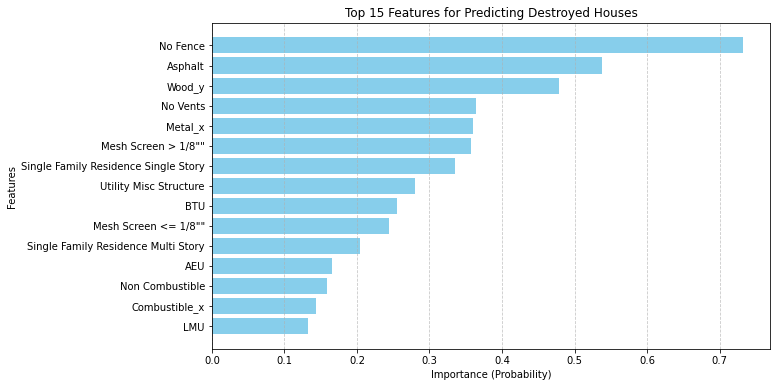

In [38]:
#Feature importance bar plot

top_features = feature_importance.head(15)


plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"], color="skyblue")
plt.gca().invert_yaxis()  
plt.xlabel("Importance (Probability)")
plt.ylabel("Features")
plt.title(f"Top 15 Features for Predicting Destroyed Houses")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

(array([0, 1]), [Text(0, 0, 'No Damage'), Text(1, 0, 'Destroyed (>50%)')])

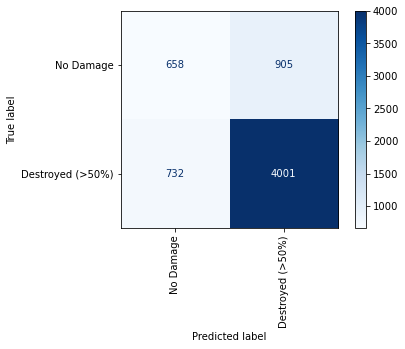

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
class_names = [
    "No Damage",
    "Destroyed (>50%)"
]

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.xticks(rotation=90)

In [40]:
TN, FP, FN, TP = cm.ravel()  


sensitivity = TP / (TP + FN)  
specificity = TN / (TN + FP) 

In [41]:
sensitivity

0.8453412212127615

In [42]:
specificity

0.4209852847088932

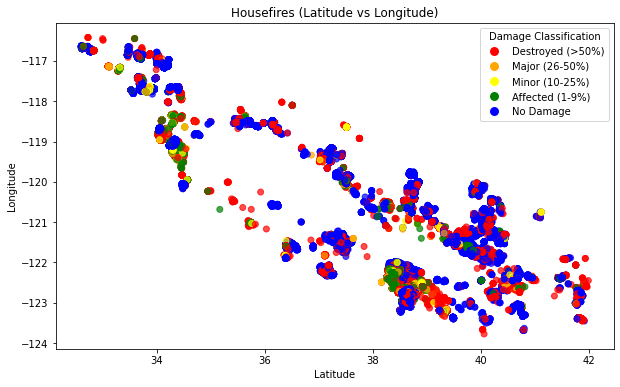

In [43]:
#Simple Map using latitude and longitude on x and y axis of scatterplot

color_map = {"Destroyed (>50%)": "red", "Major (26-50%)": "orange", "Minor (10-25%)": "yellow"
            ,"Affected (1-9%)": "green", "No Damage": "blue"}
wildfire['Color'] = wildfire["* Damage"].map(color_map)


plt.figure(figsize=(10, 6))
plt.scatter(wildfire['Latitude'], wildfire['Longitude'], c=wildfire["Color"], alpha=0.7)

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Housefires (Latitude vs Longitude)")

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[dc], markersize=10) 
           for dc in color_map]
labels = color_map.keys()
plt.legend(handles, labels, title="Damage Classification")

In [44]:
import folium
import geopandas as gpd
import pandas as pd
from folium.plugins import HeatMap

In [45]:
#Interactable heat map


california_map = folium.Map(location=[37.5, -119.5], zoom_start=6)


heat_data = wildfire3[['Latitude', 'Longitude', '* Damage']].values.tolist()


HeatMap(heat_data, radius=10, blur=15, max_zoom=13).add_to(california_map)


california_map
